# PUBG leaderboard predictions 

In [2]:
import pandas as pd
import sklearn as sk 
import numpy as np 
import matplotlib.pyplot as plt 
import keras
import seaborn as sns

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

Using TensorFlow backend.


In [2]:
#First import in the datasets, both the training and testing sets
df_train = pd.read_csv('/home/sauraj/Desktop/PUBG/train.csv')
df_test = pd.read_csv('/home/sauraj/Desktop/PUBG/test.csv')

In [3]:
#First hand information about the datasets
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4357336 entries, 0 to 4357335
Data columns (total 26 columns):
Id                 int64
groupId            int64
matchId            int64
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
maxPlace           int64
numGroups          int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(20)
memory usage: 864.3 MB


In [22]:
df_train.head(10)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,24,0,0,5,247.30,2,0,4,17,1050,2,1,65.320,29,28,1,591.3,0,0.0,0,0,782.40,4,1458,0.8571
1,1,440875,1,1,0,37.65,1,1,0,45,1072,1,1,13.550,26,23,0,0.0,0,0.0,0,0,119.60,3,1511,0.0400
2,2,878242,2,0,1,93.73,1,0,2,54,1404,0,0,0.000,28,28,1,0.0,0,0.0,0,0,3248.00,5,1583,0.7407
3,3,1319841,3,0,0,95.88,0,0,0,86,1069,0,0,0.000,97,94,0,0.0,0,0.0,0,0,21.49,1,1489,0.1146
4,4,1757883,4,0,1,0.00,0,0,1,58,1034,0,0,0.000,47,41,0,0.0,0,0.0,0,0,640.80,4,1475,0.5217
5,5,2200824,5,0,2,128.10,0,0,0,25,1000,1,1,27.300,96,96,0,2221.0,0,0.0,0,0,1016.00,4,1500,0.9368
6,6,2568717,6,1,0,130.30,0,0,0,28,1037,1,1,5.954,44,40,0,721.7,0,0.0,0,0,280.10,3,1495,0.3721
7,7,2612473,7,1,1,661.80,2,3,2,3,1148,5,2,36.640,46,46,0,0.0,0,0.0,0,0,2617.00,4,1479,1.0000
8,8,2656377,8,0,3,94.72,0,0,5,50,1286,0,0,0.000,28,28,0,2963.0,0,28.9,0,0,3139.00,5,1528,0.7037
9,9,2700597,9,0,0,137.60,0,0,0,81,1000,0,0,0.000,25,23,0,0.0,0,0.0,0,0,238.70,3,1500,0.0417


In [6]:
#Basic descriptive statistics
df_train.describe()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06
mean,3.102678e+06,1.024777e+06,2.385539e+04,2.656320e-01,9.636856e-01,1.329033e+02,6.901455e-01,2.385866e-01,1.187169e+00,4.703440e+01,1.080898e+03,9.344958e-01,5.547651e-01,1.987925e+01,4.207759e+01,4.058035e+01,1.649345e-01,4.238835e+02,2.557985e-03,4.136261e+00,1.388555e-02,5.146264e-03,1.055122e+03,3.457289e+00,1.500504e+03,4.718663e-01
std,1.797477e+06,6.967197e+05,1.378227e+04,6.342160e-01,1.560643e+00,1.699439e+02,1.191514e+00,6.103033e-01,2.366389e+00,2.732772e+01,1.237119e+02,1.566192e+00,7.223452e-01,4.586552e+01,2.267769e+01,2.206667e+01,4.672004e-01,1.222927e+03,6.346679e-02,2.757015e+01,1.329266e-01,7.425362e-02,1.116122e+03,2.402109e+00,4.253571e+01,3.079147e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.550000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.500000e+02,0.000000e+00
25%,1.537746e+06,4.741378e+05,1.191400e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.300000e+01,1.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,2.800000e+01,2.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.334000e+02,2.000000e+00,1.491000e+03,1.979000e-01
50%,3.110606e+06,9.430320e+05,2.383700e+04,0.000000e+00,0.000000e+00,8.776000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,1.029000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,2.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.732000e+02,3.000000e+00,1.500000e+03,4.583000e-01
75%,4.657295e+06,1.418544e+06,3.580100e+04,0.000000e+00,1.000000e+00,1.884000e+02,1.000000e+00,0.000000e+00,1.000000e+00,7.000000e+01,1.126000e+03,1.000000e+00,1.000000e+00,1.629000e+01,4.900000e+01,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.808000e+03,5.000000e+00,1.510000e+03,7.407000e-01
max,6.224522e+06,2.700605e+06,4.773300e+04,2.000000e+01,1.800000e+01,6.384000e+03,6.300000e+01,2.600000e+01,5.900000e+01,1.000000e+02,2.047000e+03,6.000000e+01,1.400000e+01,1.323000e+03,1.000000e+02,1.000000e+02,4.100000e+01,4.839000e+04,4.200000e+01,5.286000e+03,6.000000e+00,5.000000e+00,1.730000e+04,7.600000e+01,1.923000e+03,1.000000e+00


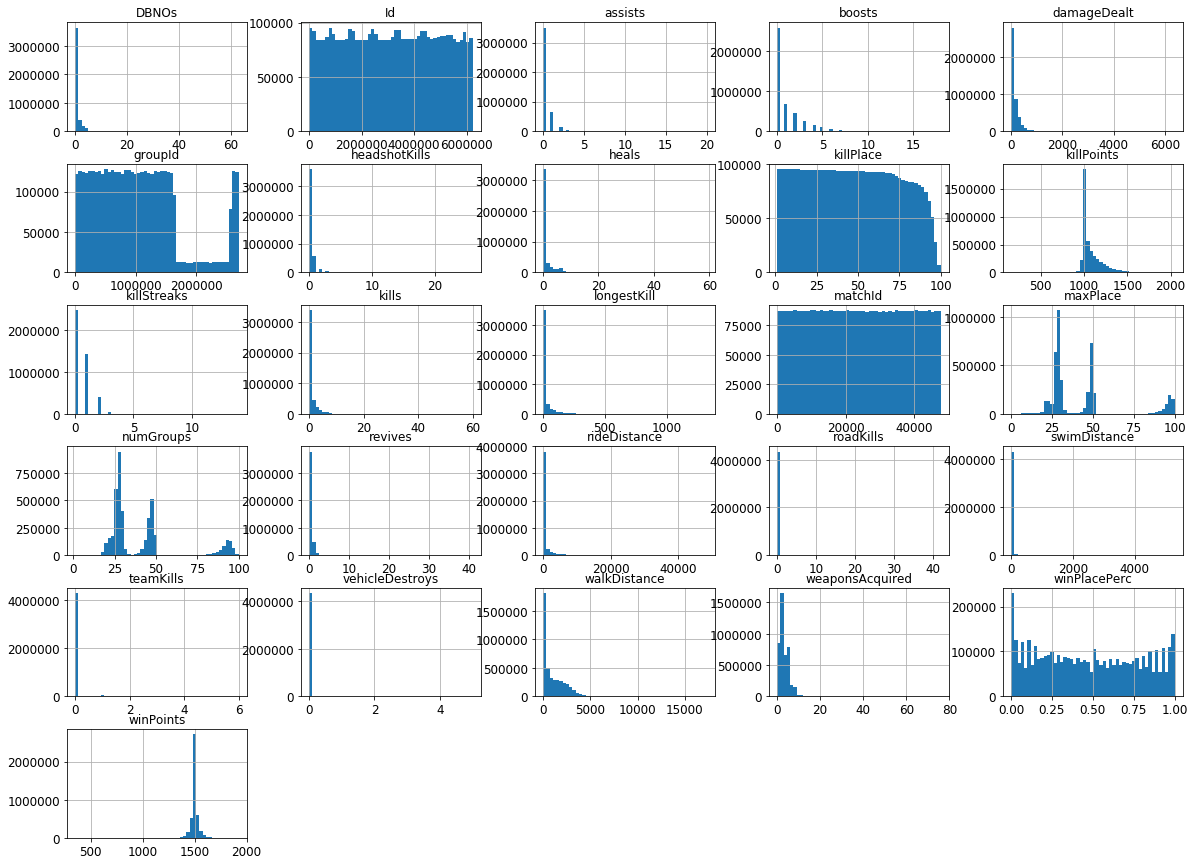

In [7]:
#Histogram plot to see all features properly
df_train.hist(bins=50, figsize=(20,15))
plt.show()

# Exploratory Data Analysis

### Boxplots of the data features

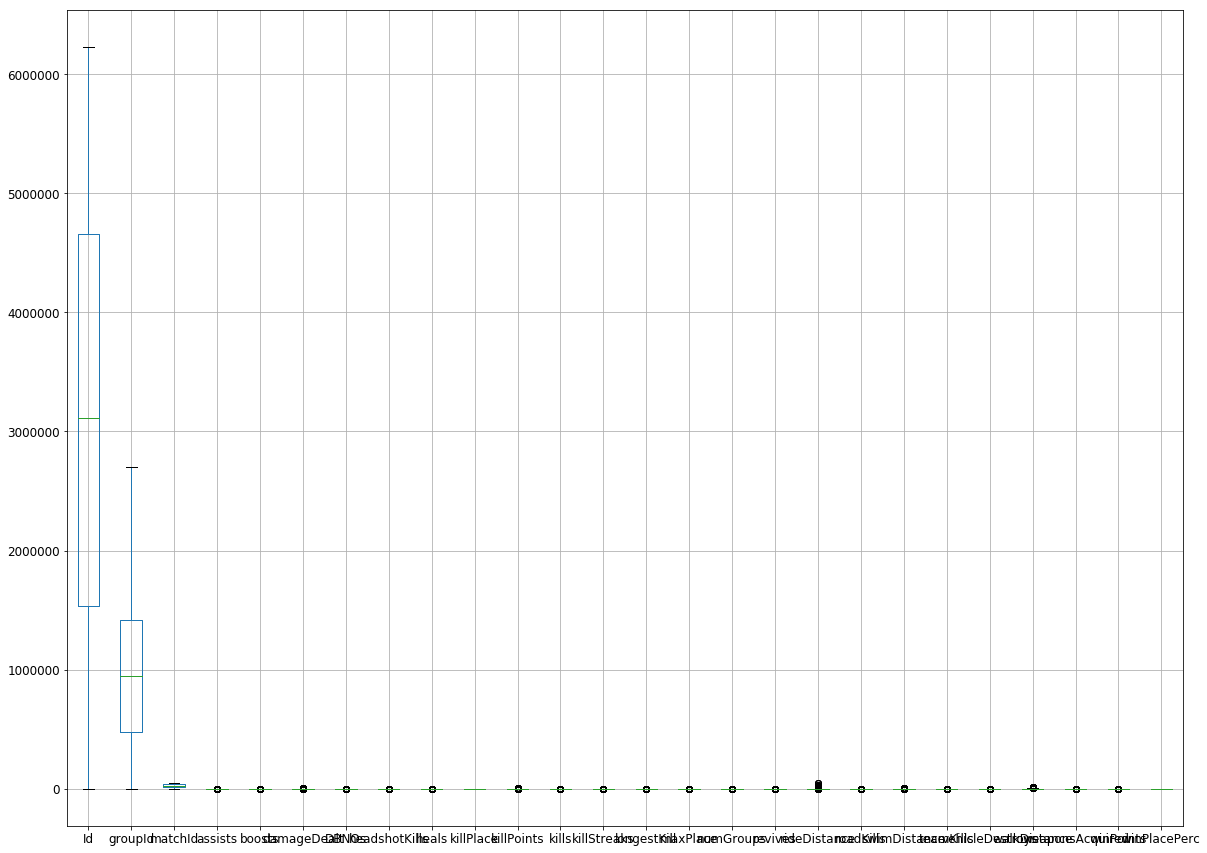

In [8]:
df_train.boxplot( figsize=(20,15))
plt.show()

## Correlation matrix

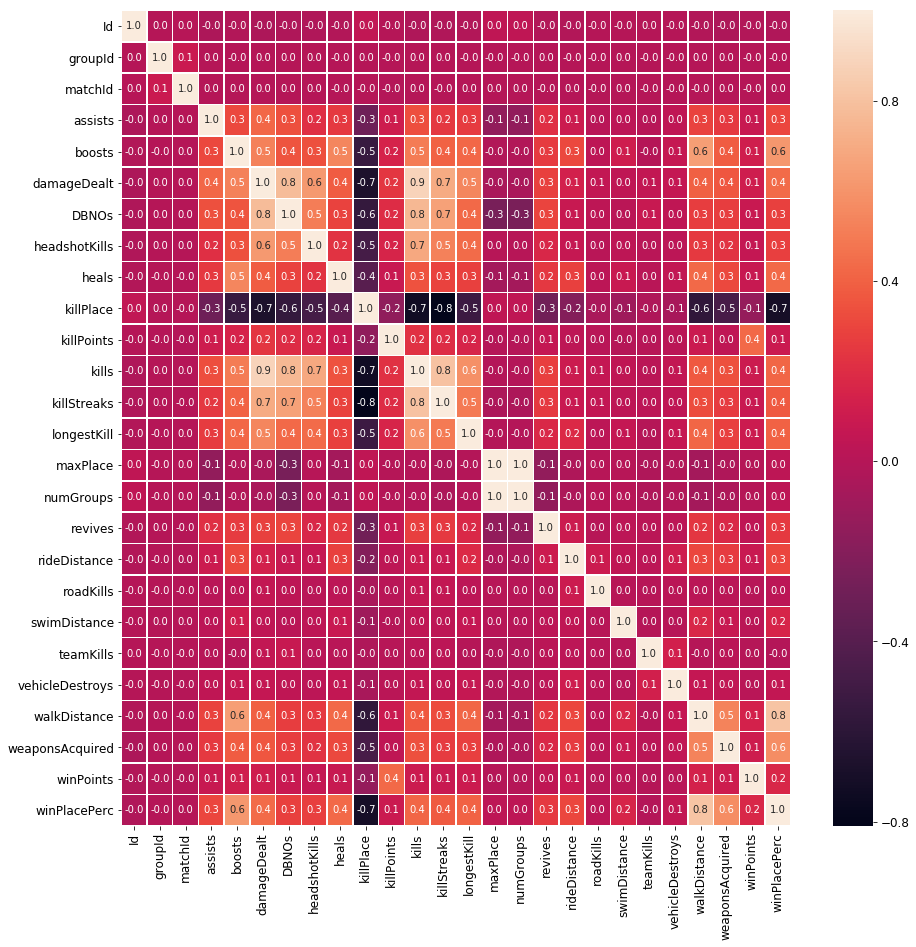

In [16]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

### Some Interesting correlations

* winPlacePerc has a strong correlation with walking distance, so the more distance you cover, the higher the chances of scoring better on the leaderboards

* More number of weapons acquired correlated with a better leaderboard score
* Number of boosts consumed also improves the scoreboard positions
* Damage dealt has a medium level correlation with winPlacePerc

## Ratio plots

### What is the Vehicle destruction to win ratio?

/home/sauraj/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


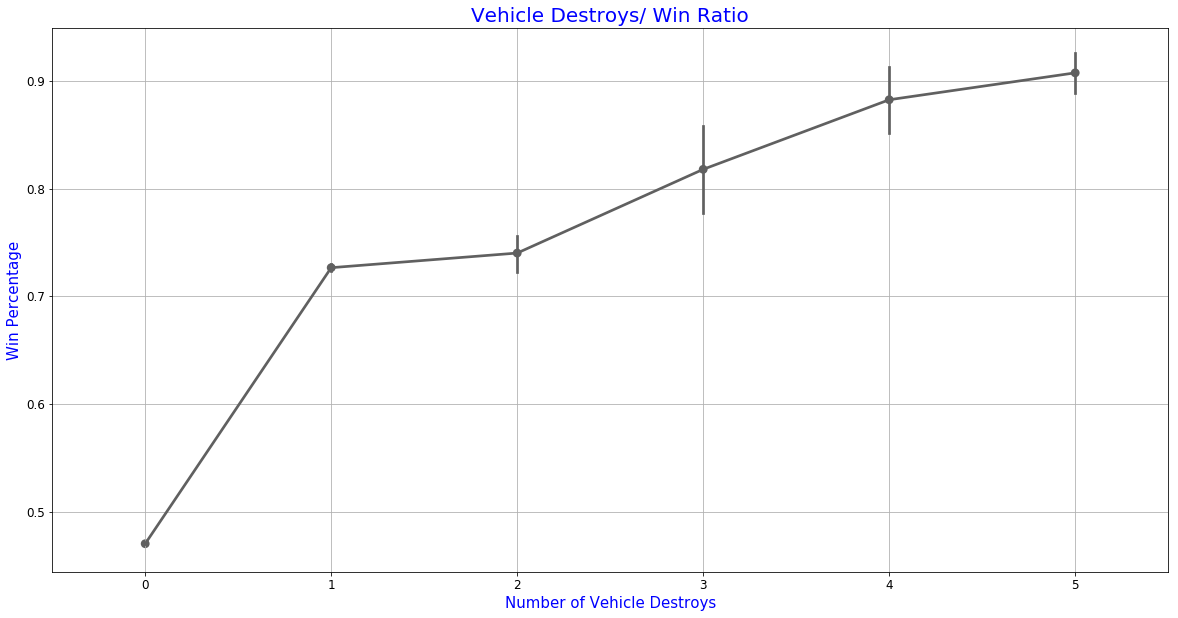

In [19]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data=df_train,color='#606060',alpha=0.8)
plt.xlabel('Number of Vehicle Destroys',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Vehicle Destroys/ Win Ratio',fontsize = 20,color='blue')
plt.grid()
plt.show()

### What is the Headshot to Win ratio?

/home/sauraj/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


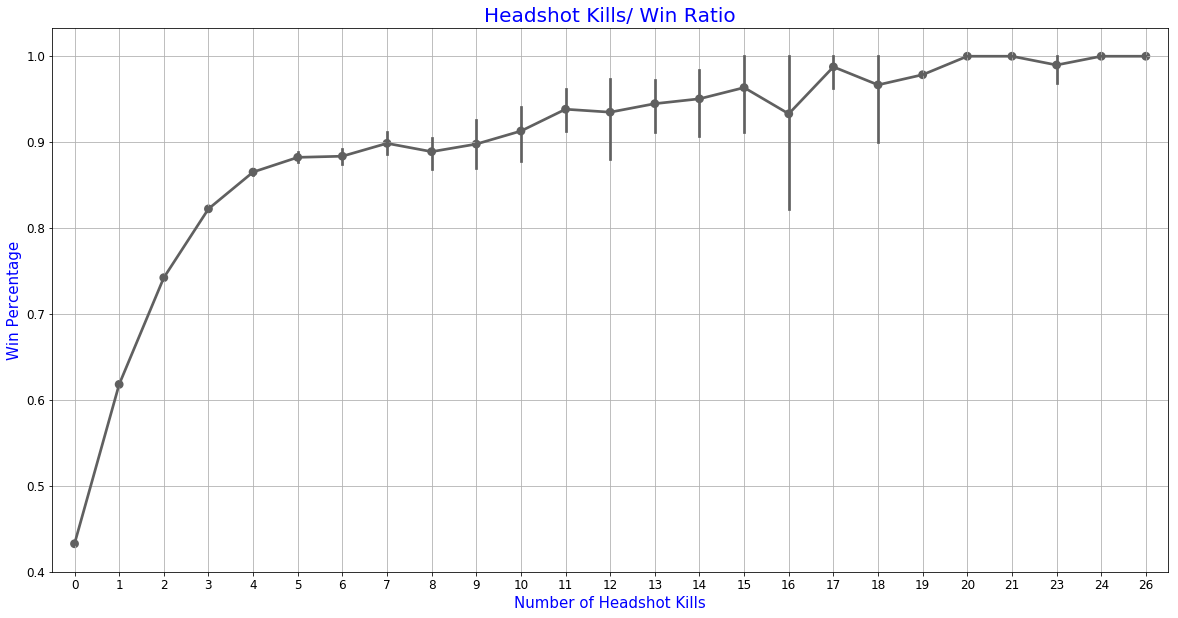

In [20]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='headshotKills',y='winPlacePerc',data=df_train,color='#606060',alpha=0.8)
plt.xlabel('Number of Headshot Kills',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Headshot Kills/ Win Ratio',fontsize = 20,color='blue')
plt.grid()
plt.show()

### How did heals and boosts affect the leaderboard standings?

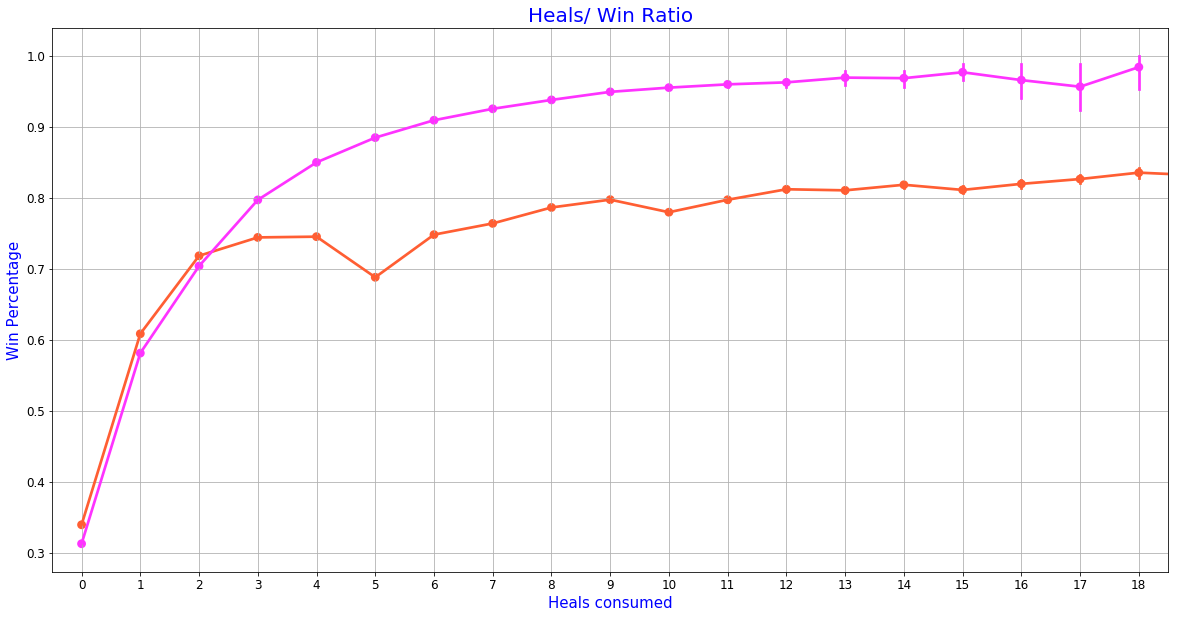

In [24]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='heals',y='winPlacePerc',data=df_train,color='#FF5E33',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=df_train,color='#FE33FF',alpha=0.8)
plt.xlabel('Heals consumed',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Heals/ Win Ratio',fontsize = 20,color='blue')
plt.grid()
plt.show()

### Revives

* Most players are hardly ever revived in the game

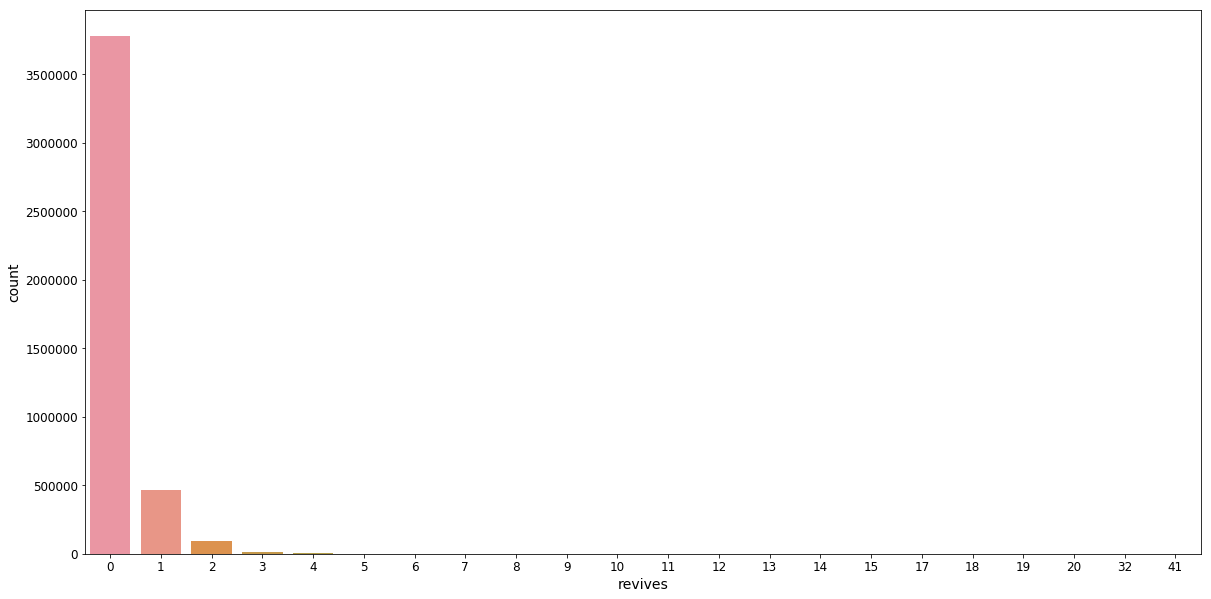

In [27]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.countplot(df_train['revives'])

### Knockout & Revive relationship

/home/sauraj/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


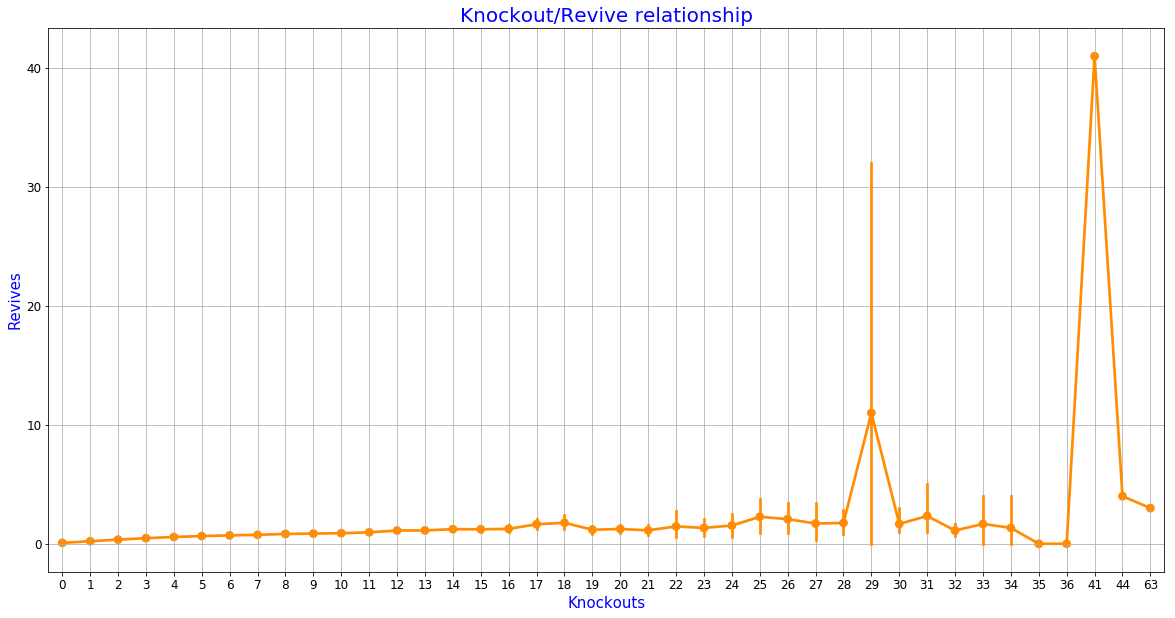

In [30]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='DBNOs',y='revives',data=df_train,color='#FF8C02',alpha=0.8)
plt.xlabel('Knockouts',fontsize = 15,color='blue')
plt.ylabel('Revives',fontsize = 15,color='blue')
plt.title('Knockout/Revive relationship',fontsize = 20,color='blue')
plt.grid()
plt.show()

### Kill Points is a feature which tells the in-match ranking of number of enemy players killed. How did that impact the leaderboard standings?

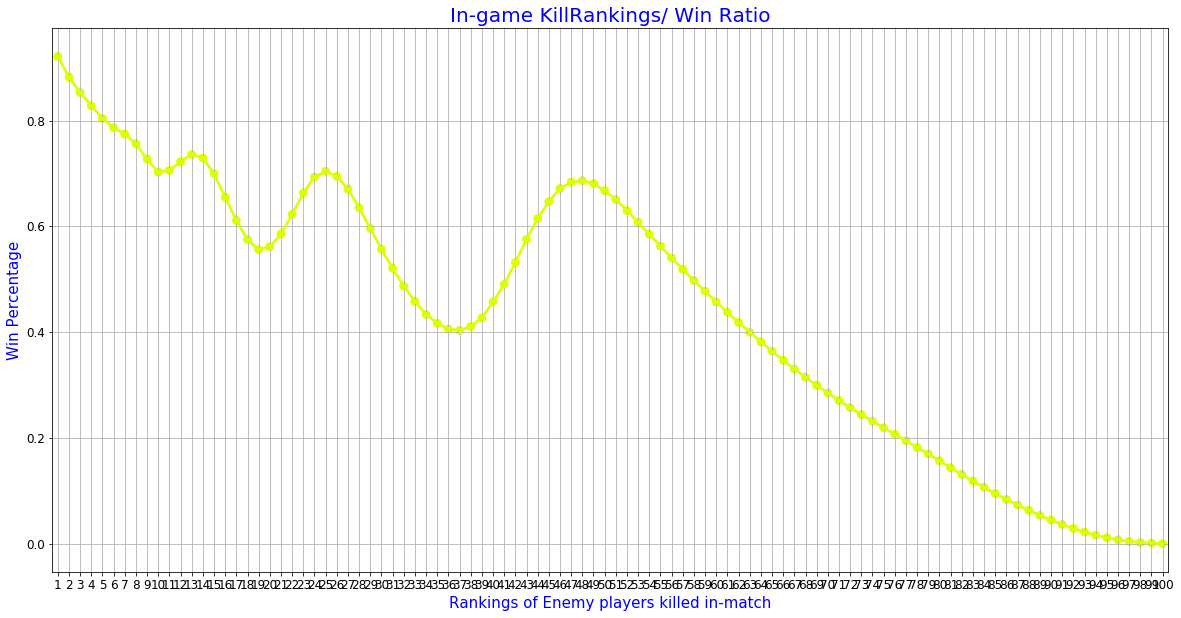

In [5]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='killPlace',y='winPlacePerc',data=df_train,color='#DDFF02',alpha=0.8)
plt.xlabel('Rankings of Enemy players killed in-match',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('In-game KillRankings/ Win Ratio',fontsize = 20,color='blue')
plt.grid()
plt.show()

In [43]:
#DBNOs/Revives/Assists [For detecting solo vs group players]
df_train.loc[(df_train['DBNOs'] == 0) & (df_train['revives'] == 0)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
3,3,1319841,3,0,0,95.88,0,0,0,86,1069,0,0,0.000,97,94,0,0.0,0,0.000,0,0,21.490,1,1489,0.1146
4,4,1757883,4,0,1,0.00,0,0,1,58,1034,0,0,0.000,47,41,0,0.0,0,0.000,0,0,640.800,4,1475,0.5217
5,5,2200824,5,0,2,128.10,0,0,0,25,1000,1,1,27.300,96,96,0,2221.0,0,0.000,0,0,1016.000,4,1500,0.9368
6,6,2568717,6,1,0,130.30,0,0,0,28,1037,1,1,5.954,44,40,0,721.7,0,0.000,0,0,280.100,3,1495,0.3721
8,8,2656377,8,0,3,94.72,0,0,5,50,1286,0,0,0.000,28,28,0,2963.0,0,28.900,0,0,3139.000,5,1528,0.7037
9,9,2700597,9,0,0,137.60,0,0,0,81,1000,0,0,0.000,25,23,0,0.0,0,0.000,0,0,238.700,3,1500,0.0417
10,10,45059,10,0,1,166.00,0,1,1,35,1000,1,1,31.130,98,96,0,0.0,0,0.000,0,0,184.500,3,1500,0.4536
11,11,89377,11,0,0,219.10,0,0,0,63,1180,0,0,0.000,30,29,0,0.0,0,0.000,0,0,1036.000,5,1533,0.4828
12,12,132815,12,0,1,196.50,0,0,0,18,1047,2,1,55.160,98,93,0,0.0,0,0.000,0,0,726.500,4,1509,0.5464
13,13,179095,13,0,5,473.40,0,0,3,10,1067,3,1,20.180,92,87,0,0.0,0,0.000,0,0,3177.000,9,1515,0.8571


# Data preprocessing and Feature Engineering

In [7]:
#First, combine both the training and testing datasets 
df_combined = pd.concat([df_train, df_test], sort=True)

##### groupId is one of the features which changes itself when 
* More than one player is within the group (Basically a Duo/Squad)
* The groups plays more than one game 

In [8]:
df_combined.loc[df_combined['groupId'] == 2]

,DBNOs,Id,assists,boosts,damageDealt,groupId,headshotKills,heals,killPlace,killPoints,killStreaks,kills,longestKill,matchId,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc,winPoints
47734,0,68192,0,0,47.30,2,0,0,52,1158,0,0,0.0,0,29,28,0,0.0,0,0.00,0,0,1088.0,3,0.6786,1485
1565274,0,2236048,0,0,0.00,2,0,0,51,1255,0,0,0.0,0,29,28,0,0.0,0,16.11,0,0,2277.0,7,0.6786,1546
3723215,0,5318575,0,1,42.57,2,0,1,53,1000,0,0,0.0,0,29,28,0,0.0,0,0.00,0,0,336.8,4,0.6786,1500


In [88]:
#group_frequenices will group the teams accordingly and catch the group size of each group
group_frequencies =  df_combined.groupby(['matchId','groupId']).size().reset_index(name='group_size')
df_combined_groupfrequencies = group_frequencies

##### We can create a new feature "TotalDistance" which will measure the total distance a player covered in the whole match

In [17]:
df_combined['TotalDistance'] = df_combined['walkDistance'] + df_combined['rideDistance'] + df_combined['swimDistance']
df_combined.head()

,DBNOs,Id,assists,boosts,damageDealt,groupId,headshotKills,heals,killPlace,killPoints,killStreaks,kills,longestKill,matchId,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc,winPoints,TotalDistance
0,2,0,0,5,247.30,24,0,4,17,1050,1,2,65.32,0,29,28,1,591.3,0,0.0,0,0,782.40,4,0.8571,1458,1373.70
1,1,1,1,0,37.65,440875,1,0,45,1072,1,1,13.55,1,26,23,0,0.0,0,0.0,0,0,119.60,3,0.0400,1511,119.60
2,1,2,0,1,93.73,878242,0,2,54,1404,0,0,0.00,2,28,28,1,0.0,0,0.0,0,0,3248.00,5,0.7407,1583,3248.00
3,0,3,0,0,95.88,1319841,0,0,86,1069,0,0,0.00,3,97,94,0,0.0,0,0.0,0,0,21.49,1,0.1146,1489,21.49
4,0,4,0,1,0.00,1757883,0,1,58,1034,0,0,0.00,4,47,41,0,0.0,0,0.0,0,0,640.80,4,0.5217,1475,640.80


In [20]:
#What is the correlation between the total distance covered and the win percentage?
df_train['TotalDistance'] = df_train['walkDistance'] + df_train['rideDistance'] + df_train['swimDistance']
np.corrcoef(df_train['TotalDistance'], df_train['winPlacePerc'])

array([[1.        , 0.67507494],
       [0.67507494, 1.        ]])

##### Heals and Boosts are support items which help to increase the survivability in game. Hence these two can be grouped in a new feature called "Logistics"

In [23]:
df_combined['Logistics'] = df_combined['heals'] + df_combined['boosts']

#### A player's score on the leaderboards is highly affected by their playstyle, which is a combination of the total distance covered, damage dealt, boosts consumed and heals used.

* Aggressive players will have a high **kill to walking** and **damage to walking** ratio. If the ratio is greater than 1, the player has an offensive playstyle since they are inflicting damage per distance covered. This ratio will help to offset those scores which might be high due to camping since campers can inflict high damage to any other ratio and appear aggressive.

* Another important feature to measure aggressiveness and strong playstyle is the **kill to boost ratio** and **damage to boost** since boosts are consumed to increase in game agility and heal above 75 HP, and any player who would want to play aggressive will obviously deal high damage, cover a high range of distance to encounter more enemies and consume more boosts to increase survivability.

In [49]:
#Create two new features, damage/distance ratio and damage/boost ratio.
df_combined['dmgtodist'] = df_combined['damageDealt'] / df_combined['walkDistance']
df_combined['dmgtoboost'] = df_combined['damageDealt'] / (df_combined['boosts']+1)

df_combined['dmgtoboost'].fillna(0, inplace=True)
df_combined['dmgtodist'].fillna(0, inplace=True)

In [57]:
np.corrcoef(df_combined['Logistics'], df_combined['damageDealt'])

array([[1.        , 0.49692365],
       [0.49692365, 1.        ]])

In [82]:
#Kills/dist ratio and kills/heals ratio 
df_combined['killtodist'] = df_combined['kills'] / (df_combined['walkDistance']+1)
df_combined['killtoboost'] = df_combined['kills'] / (df_combined['boosts']+1)
df_combined.killtoboost.fillna(0, inplace=True)

In [85]:
df_combined

,DBNOs,Id,assists,boosts,damageDealt,groupId,headshotKills,heals,killPlace,killPoints,killStreaks,kills,longestKill,matchId,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc,winPoints,TotalDistance,Logistics,dmgtodist,dmgtoboost,killtodist,killtoboost,killtoheals
0,2,0,0,5,247.300,24,0,4,17,1050,1,2,65.320,0,29,28,1,591.3,0,0.0000,0,0,782.400,4,0.8571,1458,1373.7000,9,0.316079,41.216667,0.002553,0.333333,0.400000
1,1,1,1,0,37.650,440875,1,0,45,1072,1,1,13.550,1,26,23,0,0.0,0,0.0000,0,0,119.600,3,0.0400,1511,119.6000,0,0.314799,37.650000,0.008292,1.000000,1.000000
2,1,2,0,1,93.730,878242,0,2,54,1404,0,0,0.000,2,28,28,1,0.0,0,0.0000,0,0,3248.000,5,0.7407,1583,3248.0000,3,0.028858,46.865000,0.000000,0.000000,0.000000
3,0,3,0,0,95.880,1319841,0,0,86,1069,0,0,0.000,3,97,94,0,0.0,0,0.0000,0,0,21.490,1,0.1146,1489,21.4900,0,4.461610,95.880000,0.000000,0.000000,0.000000
4,0,4,0,1,0.000,1757883,0,1,58,1034,0,0,0.000,4,47,41,0,0.0,0,0.0000,0,0,640.800,4,0.5217,1475,640.8000,2,0.000000,0.000000,0.000000,0.000000,0.000000
5,0,5,0,2,128.100,2200824,0,0,25,1000,1,1,27.300,5,96,96,0,2221.0,0,0.0000,0,0,1016.000,4,0.9368,1500,3237.0000,2,0.126083,42.700000,0.000983,0.333333,1.000000
6,0,6,1,0,130.300,2568717,0,0,28,1037,1,1,5.954,6,44,40,0,721.7,0,0.0000,0,0,280.100,3,0.3721,1495,1001.8000,0,0.465191,130.300000,0.003557,1.000000,1.000000
7,2,7,1,1,661.800,2612473,3,2,3,1148,2,5,36.640,7,46,46,0,0.0,0,0.0000,0,0,2617.000,4,1.0000,1479,2617.0000,3,0.252885,330.900000,0.001910,2.500000,1.666667
8,0,8,0,3,94.720,2656377,0,5,50,1286,0,0,0.000,8,28,28,0,2963.0,0,28.9000,0,0,3139.000,5,0.7037,1528,6130.9000,8,0.030175,23.680000,0.000000,0.000000,0.000000
9,0,9,0,0,137.600,2700597,0,0,81,1000,0,0,0.000,9,25,23,0,0.0,0,0.0000,0,0,238.700,3,0.0417,1500,238.7000,0,0.576456,137.600000,0.000000,0.000000,0.000000


### Combine all the new features and delete the useless ones

In [90]:
df_combined = pd.merge(df_combined, df_combined_groupfrequencies)

In [95]:
df_train.tail()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,TotalDistance
4357331,6224518,1652603,47575,0,5,196.4,2,0,4,28,1069,1,1,21.80,29,28,1,2721.0,0,24.56,0,0,3070.00,3,1475,0.8929,5815.56
4357332,6224519,1653346,47592,2,2,358.1,4,3,2,7,1308,4,2,128.40,30,27,0,0.0,0,0.00,0,0,2820.00,6,1484,0.7241,2820.00
4357333,6224520,1657176,47679,0,3,559.0,4,1,3,8,1000,4,2,36.05,30,29,0,0.0,0,0.00,1,0,400.60,2,1500,0.4483,400.60
4357334,6224521,1658403,47707,0,0,100.0,0,0,0,89,1097,0,0,0.00,29,28,0,0.0,0,0.00,1,0,68.82,1,1502,0.1429,68.82
4357335,6224522,1658560,47710,0,2,126.3,1,1,0,24,1093,1,1,47.13,27,27,0,0.0,0,0.00,0,0,2079.00,4,1517,0.8077,2079.00


In [94]:
df_combined = df_combined.drop(['Id', 'groupId', 'matchId'], axis=1)

KeyError: "['Id' 'groupId' 'matchId'] not found in axis"

In [101]:
df_train_new = df_combined[:4357336]
df_test_new = df_combined[4357336:]

,DBNOs,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,killStreaks,kills,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc,winPoints,TotalDistance,Logistics,dmgtodist,dmgtoboost,killtodist,killtoboost,killtoheals,group_size
0,2,0,5,247.30,0,4,17,1050,1,2,65.3200,29,28,1,591.3,0,0.000,0,0,782.400,4,0.8571,1458,1373.700,9,0.316079,41.216667,0.002553,0.333333,0.400000,2
1,2,0,3,284.20,0,9,16,1050,2,2,3.4060,29,28,0,762.1,0,0.000,0,0,1857.000,3,0.8571,1457,2619.100,12,0.153043,71.050000,0.001076,0.500000,0.200000,2
2,1,1,0,37.65,1,0,45,1072,1,1,13.5500,26,23,0,0.0,0,0.000,0,0,119.600,3,0.0400,1511,119.600,0,0.314799,37.650000,0.008292,1.000000,1.000000,8
3,2,0,0,149.70,0,0,46,1009,1,1,2.4090,26,23,0,0.0,0,0.000,0,0,172.700,2,0.0400,1492,172.700,0,0.866821,149.700000,0.005757,1.000000,1.000000,8
4,0,0,0,0.00,0,0,81,1002,0,0,0.0000,26,23,0,0.0,0,0.000,0,0,113.100,2,0.0400,1451,113.100,0,0.000000,0.000000,0.000000,0.000000,0.000000,8
5,0,0,0,0.00,0,0,80,1053,0,0,0.0000,26,23,0,0.0,0,0.000,0,0,197.300,0,0.0400,1525,197.300,0,0.000000,0.000000,0.000000,0.000000,0.000000,8
6,0,0,0,0.00,0,0,82,1013,0,0,0.0000,26,23,0,0.0,0,0.000,0,0,125.500,0,0.0400,1483,125.500,0,0.000000,0.000000,0.000000,0.000000,0.000000,8
7,1,0,0,44.59,0,0,44,1000,1,1,0.8857,26,23,1,0.0,0,0.000,0,0,85.080,3,0.0400,1500,85.080,0,0.524095,44.590000,0.011617,1.000000,1.000000,8
8,0,1,0,33.48,0,1,78,1000,0,0,0.0000,26,23,0,0.0,0,0.000,0,0,157.500,1,0.0400,1500,157.500,1,0.212571,33.480000,0.000000,0.000000,0.000000,8
9,0,0,0,89.26,0,0,79,1000,0,0,0.0000,26,23,0,0.0,0,0.000,0,0,175.900,3,0.0400,1500,175.900,0,0.507447,89.260000,0.000000,0.000000,0.000000,8


In [102]:
df_train_new.to_csv('df_train_new.csv')

In [103]:
df_test_new.to_csv('df_test_new.csv')

### Model Building

In [4]:
df_train_new = pd.read_csv('/home/sauraj/Desktop/PUBG/df_train_new.csv')
df_test_new = pd.read_csv('/home/sauraj/Desktop/PUBG/df_test_new.csv')

In [9]:
df_train_new = df_train_new.drop(['Unnamed: 0'], axis=1)

In [5]:
import sklearn as sk 
import xgboost as xgb

#Models 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [10]:
X = df_train_new.drop(['winPlacePerc'], axis=1)
y = df_train_new['winPlacePerc']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Function to calculate the average MSE of a given model via cross-validation on the training set 
def mse_calculator(model, X_train, y_train):
    cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    average_cv_mse = -(np.mean(cv_scores))
    print("Average MSE for 10 fold CV: ", average_cv_mse)

In [ ]:
linreg = LinearRegression()
ada = AdaBoostRegressor()
xgbr = XGBRegressor()
gbr = GradientBoostingRegressor()
rf = RandomForestRegressor()

mse_calculator(ada, X_train, y_train)